## Visualizatiom of Generated Syntehtic Data

In [1]:
import pandas as pd
import anndata as ad
import scanpy as sc

/gpfs/scratchfs01/site/u/andera29/micromamba/envs/conceptlab/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/gpfs/scratchfs01/site/u/andera29/micromamba/envs/conceptlab/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/gpfs/scratchfs01/site/u/andera29/micromamba/envs/conceptlab/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/gpfs/scratchfs01/site/u/andera29/micromamba/envs/conceptlab/lib/python3.11/site-packages/anndata/__init__.py:44: FutureWar

In [2]:
import matplotlib.pyplot as plt
import conceptlab as clab

In [3]:
dataset = clab.datagen.omics.OmicsDataGenerator.generate(n_obs = 20000,
                                                         n_batches=2,
                                                         n_tissues = 2,
                                                         n_concepts= 6,
                                                         n_vars = 5000,
                                                         beta_b=0.8,
                                                         std_batch= 0.06,
                                                         std_celltype = 0.04,
                                                         std_tissue = 0.05,
                                                         std_concept = 0.05,
                                                         std_noise=0.04,
                                                        )

In [4]:
X = dataset.data.to_pandas()
C = dataset.concepts.to_pandas()
T = dataset.tissues.to_pandas()
B = dataset.batches.to_pandas()
U = dataset.celltypes.to_pandas()

In [5]:
adata = ad.AnnData(X)

In [6]:
adata.obs = pd.concat((pd.DataFrame(U),pd.DataFrame(T),pd.DataFrame(B)), axis =1)
adata.obs.columns = ['cell_type','tissue', 'batch']

In [7]:
adata.obsm['concepts'] = C

In [8]:
adata.obs = pd.concat((adata.obs, C),axis =1)

In [9]:
adata

AnnData object with n_obs × n_vars = 20000 × 5000
    obs: 'cell_type', 'tissue', 'batch', 'concept_0', 'concept_1', 'concept_2', 'concept_3', 'concept_4', 'concept_5'
    obsm: 'concepts'

In [10]:
sc.pp.normalize_total(adata,1e4)
sc.pp.log1p(adata)

sc.pp.pca(adata)


/tmp/slurmjob.9435271/ipykernel_3587164/130961226.py:1: FutureWarning: The specified parameters ('target_sum',) are no longer positional. Please specify them like `target_sum=10000.0`
  sc.pp.normalize_total(adata,1e4)


In [11]:
sc.pp.neighbors(adata,n_neighbors = 50, metric='cosine')

In [12]:
sc.tl.umap(adata, min_dist = 1.0, spread = 0.4, )

In [13]:
%matplotlib inline

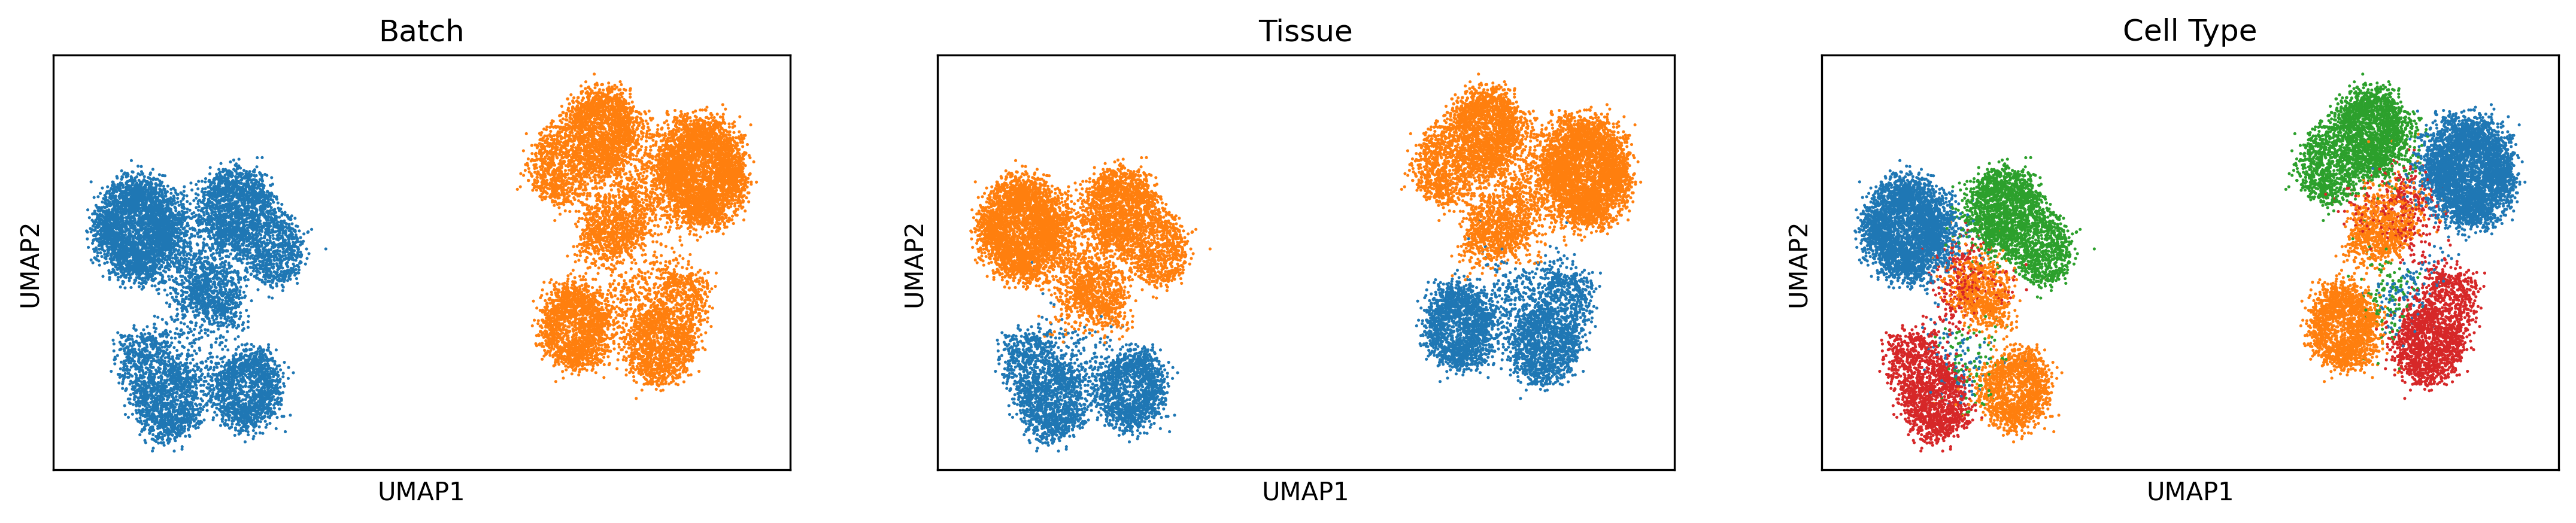

In [18]:
fig, ax = plt.subplots(1,3, figsize = (18, 3), dpi = 300)

for axx, label, pretty_label in zip(ax, ['cell_type','tissue','batch'][::-1],['Cell Type','Tissue', 'Batch'][::-1]):
    sc.pl.umap(adata, color = label, ax = axx, legend_loc='none', show = False,title=pretty_label)



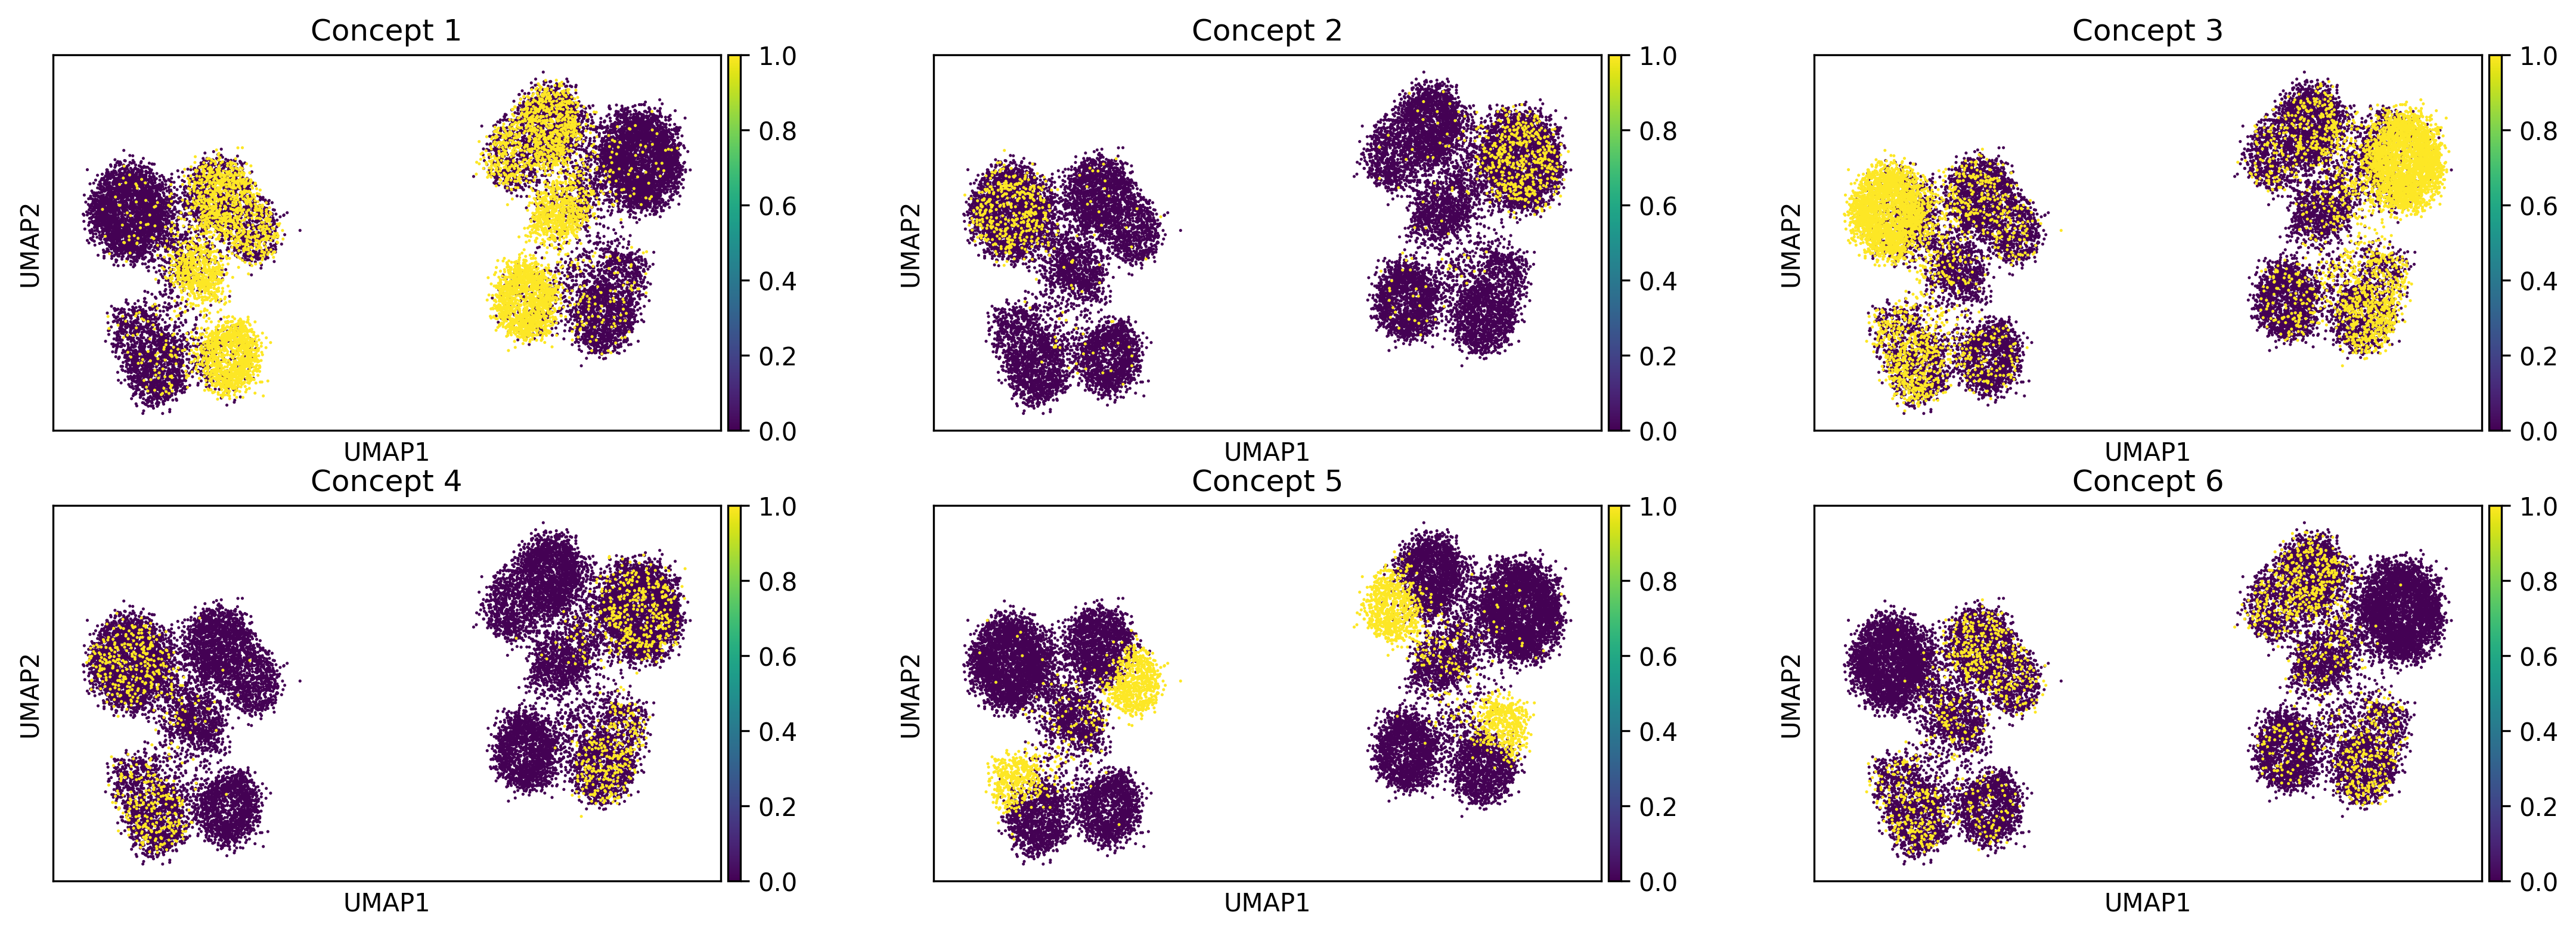

In [20]:
n_concepts = adata.obsm['concepts'].shape[1]
fig, ax = plt.subplots(2,n_concepts   // 2, figsize = (6 * (n_concepts // 2), 6), dpi = 300)
ax = ax.flatten()

for k, axx in enumerate(ax):
    sc.pl.umap(adata, color = 'concept_{}'.format(k), ax = axx, show = False,)
    axx.set_title('Concept {}'.format(k +1))
